# Images and Image Plotting

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h3><span class="fa fa-certificate"></span> Learning Objectives </h3>
</div>
<ul>
    <li>Understand the concept of arrays as images</li>
    <li>Load and display an image</li>
    <li>Use array slicing operations to crop an image</li>
    <li>Animate an image plot</li>
</ul>
</section>

## Arrays as images

All photographic images represent a measurement of how much light hits the receiver. For instance, the Hubble image below is obtained by measuring the brightnesses of distant stars:

![Hubble image](fig/galaxy.jpg)

With traditional optical cameras, this measurement results in an image which is continuous, as it is projected directly onto paper. In order to store images digitally, they need to be divided into discrete chunks, pixels, each of which contains the value of the measurement in that small portion of the image. In this representation, an image is simply a grid of numbers, which allows it to be easily stored as an array with a shape equal to the resolution of the image.

The `scikit-image` (abbreviated to `skimage` in code) module contains some sample images in the `data` submodule that we can use to demonstrate this principle.

In [3]:
# Get some import statements out of the way.
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import data


In [4]:
# Load the data.moon() image and print it
moon  = data.moon()
print(moon)

[[116 116 122 ...,  93  96  96]
 [116 116 122 ...,  93  96  96]
 [116 116 122 ...,  93  96  96]
 ..., 
 [109 109 112 ..., 117 116 116]
 [114 114 113 ..., 118 118 118]
 [114 114 113 ..., 118 118 118]]


Once read in as an array, the image can be processed in the same ways as any other array. For instance, we can easily find the highest, lowest and mean values of the image, the type of the variables stored in the array, and the resolution of the image:

In [9]:
# Output the image minimum, mean and maximum.
print('Image min:',moon.min(),' Image mean:', moon.mean(),' Image max', moon.max())
# Output the array dtype.
print('Data type: ', moon.dtype)
# Output image size.
print(moon.shape)

Image min: 0  Image mean: 112.169570923  Image max 255
Data type:  uint8
(512L, 512L)


This tells us that the image has a resolution of 512 x 512 pixels, and is stored as integers between 0 and 255. This is a common way of normalising images, but they can just as easily be stored as floats between 0 and 1. More commonly with astronomical data though, an image will consist of photon counts (i.e. integers), so the minimum will be 0 and any upper limit will likely be defined by the capabilities of the instrument.

## Plotting images

While storing an image as a grid of numbers is very useful for analysis, we still need to be able to visually inspect the image. This can be achieved with `plt.imshow()`, which allocates a colour to every element in the array according to its value.

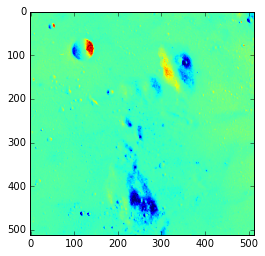

In [10]:
# Display image array with imshow()
plt.imshow(moon)


When plotting an image in this way, you will often need to know what actual values correspond to the colours. To find this out, we can draw a colour bar alongside the image which indicates the mapping of values to colours:

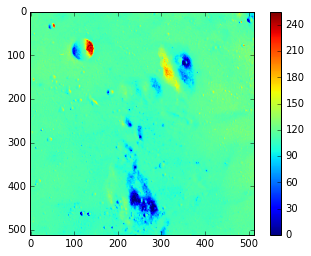

In [11]:
plt.imshow(moon)
plt.colorbar()

You may notice that the default mapping of values to colours doesn't show the features of this image very well. Fortunately, matplotlib provides a large variety of colour maps which are suitable for various different purposes (more on this later). `plt.imshow()` has a `cmap` keyword argument which can be passed a string defining the desired colour map.

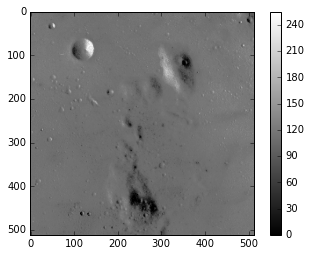

In [14]:
# Display the image with a better colour map.
plt.imshow(moon,cmap='gray')
plt.colorbar()

The full list of available colour maps (for matplotlib 1.5) can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).

<section class="callout panel panel-info">
<div class="panel-heading">
<h3><span class="fa fa-certificate"></span> Colour maps </h3>
</div>

As the images above demonstrate, the choice of colour map can make a significant difference to how your image appears, and is therefore extremely important. This is partly due to discrepancies between how quickly the colour map changes and how quickly the data changes, and partly due to the fact that [different people see colour differently](https://en.wikipedia.org/wiki/The_dress_%28viral_phenomenon%29).<br/><br/>

In particular, matplotlib's default `'jet'` colour map is notoriously bad for displaying data. This is because it is not designed taking into account how the human eye percieves colour. This leads to some parts of the colour map appearing to change very slowly, while other parts of the colour map shift from one hue to another in a very short space. The practical effect of this is to both smooth some parts of the image, obscuring the data, and to create artificial features in the image where the data is smooth.<br/><br/>

There is no single 'best' colour map - different colour maps display different kinds of image most clearly - but the `jet` map is almost never an appropriate choice for displaying any data. In general, colour maps which vary luminosity uniformly (such as the `'gray'` colour map above or the `'cubehelix'` colour map) tend to be better. Plots of various colour maps' luminosities can be found [here](http://matplotlib.org/users/colormaps.html).<br/><br/>

For a good background on this topic and a description of a decent all-round colour map scheme, see [this paper](http://www.kennethmoreland.com/color-maps/ColorMapsExpanded.pdf).

</section>

<section class="challenges panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Load and plot an image </h3>
</div>

<ol>
    <li> Try loading and plotting some other image arrays from `skimage.data`. Choose one of these images and print some basic information about the values it contains.</li>
    <li> Plot your chosen image with `imshow()`. Apply a colour map of your choice and display a colour bar.</li>
</ol>
</section>

In [32]:
# 1
# Load an image from skimage.data
im = data.coins()
# Print image shape and size
print('Image shape :{}',im.shape)
print('Image size :{}',im.size)
# Print data type and min&max  of array
print('Image type :{}',type(im.shape))
print('Image min :{}',im.min(),' Image max :{}',im.max())



Image shape :{} (303L, 384L)
Image size :{} 116352
Image type :{} <type 'tuple'>
Image min :{} 1  Image max :{} 252


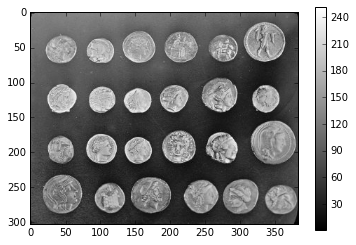

In [33]:
# 2
# Display my image
plt.imshow(im,cmap='gray')
plt.colorbar()


### Value limits

The default behaviour of `imshow()` in terms of colour mapping is that the colours cover the full range of the data so that the lower end (blue, in the plots above) represents the smallest value in the array, and the higher end (red) represents the greatest value.


This is fine if rest of the values are fairly evenly spaced between these extremes. However, if we have a very low minimum or very high maximum compared to the rest of the image, this default scaling is unhelpful. To deal with this problem, `imshow()` allows you to set the minimum and maximum values used for the scaling with the `vmin` and `vmax` keywords.

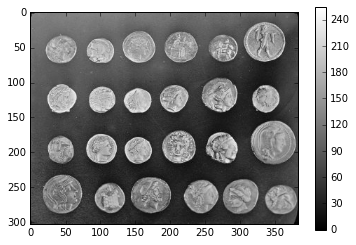

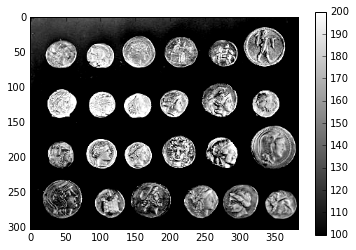

In [34]:
fig=plt.figure()
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.colorbar()

fig=plt.figure()
plt.imshow(im,cmap='gray',vmin=100,vmax=200)
plt.colorbar()


As you can see, this allows us to increase the contrast of the image at the cost of discounting extreme values, or we can include a broader range of values but see less detail. Similar effects can also be achieved with the `norm` keyword, which allows you to set how `imshow()` scales values in order to map them to colours (linear or logarithmic scaling, for example).

### Axes

You will notice in the above plots that the axes are labelled with the pixel coordinates of the image. You will also notice that the origin of the axes is in the top left corner rather than the bottom left. This is a convention in image-drawing, but can be changed if necessary by setting the `origin` keyword to `'lower'` when calling `imshow()`:

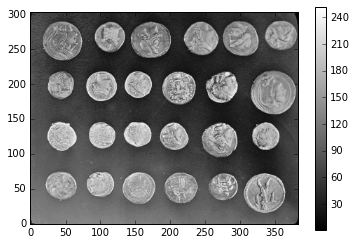

In [35]:
fig=plt.figure()
plt.imshow(im,cmap='gray',origin='lower')
plt.colorbar()


`imshow()` also allows you to change the upper and lower values of each axis, and the appropriate tick labels will be drawn. This feature can be used to apply physical spatial scales to the image (if you know them) rather than going purely on pixel positions, which may be less useful. This is done with the `extent` keyword, which takes a list of values corresponding to lower and upper x values and the lower and upper y values (in that order).

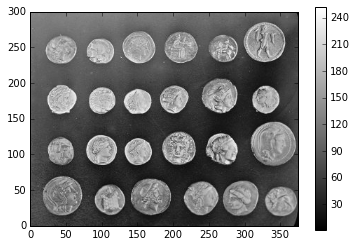

In [41]:
fig=plt.figure()
plt.imshow(im,cmap='gray',extent=[0,375,0,300])
plt.colorbar()


<section class="objectives panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Value and axes limits </h3>
</div>

<ol>
    <li>Plot your chosen image again. Try changing the upper and lower limits of the plotted values to adjust how the image appears.</li>
    <li>Assume that each pixel of your image has some defined size (you decide a value - not unity). Adjust the axis limits accordingly so that the ticks correspond to physical distances rather than pixel values.</li>
</ol>
</section>

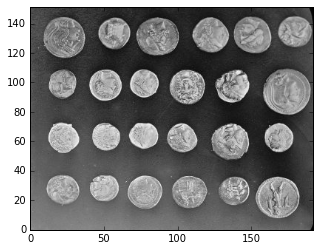

In [49]:
# 1 
# Display the coins image with adjusted value range
fig=plt.figure()
px_sz = 0.5
plt.imshow(im,cmap='gray',origin='lower',extent=[0,im.shape[1]*px_sz,0,im.shape[0]*px_sz])



In [ ]:
# 2


## Loading an image from a file

The image used in the examples above uses an image which is already supplied as an array by scikit-image. But what if we have been given an image file and we want to read it into Python?

There are many ways to do this, depending on the type of file. Typically in astronomy, images are stored in FITS format, which will be covered in detail later on. For now, we will return to the example of the Hubble image from earlier, which is stored in this repo in fig/galaxy.jpg. To load image data from a JPEG, we need the `plt.imread()` function. This takes a filename which points at an image file and loads it into Python as a NumPy array.

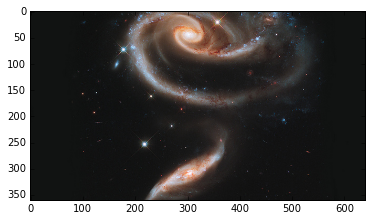

In [51]:
# Load the Hubble image from fig/galaxy.jpg
# PLot the image with imshow()
galaxy_image = plt.imread('fig/galaxy.jpg')
plt.imshow(galaxy_image)

You may notice that instead of using a colour map, this image has been plotted in full colour so it looks the same as the original image above. We can see why if we inspect the shape of the image array:

In [52]:
galaxy_image.shape

(360L, 640L, 3L)

Rather than just being a 2D array with a shape equivalent to the image resolution, the array has an extra dimension of length 3. This is because the image has been split into red, blue and green components, each of which are stored in a slice of the array. When given an n x m x 3 array like this, `imshow()` interprets it as an RGB image and combines the layers into a single image.

However, if we wish to see the individual components they can be accessed and displayed by taking a slice of the array corresponding to the layer we wish to use.

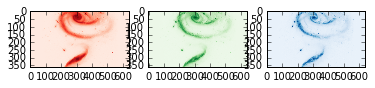

In [65]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.imshow(galaxy_image[...,0],cmap='Reds')
ax2.imshow(galaxy_image[...,1],cmap='Greens')
ax3.imshow(galaxy_image[...,2],cmap='Blues')

## `plt.subplots()`

As we've already seen, multiple axes can be added to a single figure using `plt.add_subplot()`. There is also a function that allows you to define several axes and their arrangement at the same time as the figure, `plt.subplots()`.

This function returns a tuple of two objects - the figure and an array of axes objects with the specified shape. Referencing the axes array allows things to be plotted on the individual subplots.

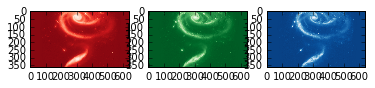

In [69]:
# Make a grid of 1 x 3 plots and show the Hubble image on the right.
fig, ax = plt.subplots(1,3)
ax[0].imshow(galaxy_image[...,0],cmap='Reds_r')
ax[1].imshow(galaxy_image[...,1],cmap='Greens_r')
ax[2].imshow(galaxy_image[...,2],cmap='Blues_r')

<section class="objectives panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Image components </h3>
</div>

<ol>
    <li>Create a 2x2 grid of plots using `plt.subplots()`. For either the Hubble image or another RGB image of your choice from `skimage.data`, plot the true colour image and each RGB component on one of these subplots.</li>
</ol>
</section>

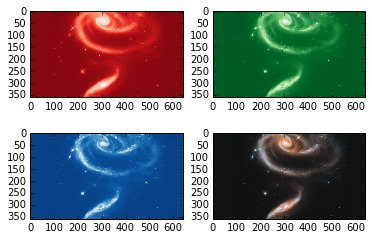

In [84]:
# 1
# Create 2x2 grid of subplots
# Plot image and image components with appropriate colour maps.
fig, ax = plt.subplots(2,2)

ax[0,0].imshow(galaxy_image[...,0],cmap='Reds_r')
ax[0,1].imshow(galaxy_image[...,1],cmap='Greens_r')
ax[1,0].imshow(galaxy_image[...,2],cmap='Blues_r')
ax[1,1].imshow(galaxy_image)


## Slicing images

We saw above that an RGB image array can be sliced to access one colour component. But the array can also be sliced in one or both of the image dimensions to crop the image. For instance, the smaller galaxy at the bottom of the image above occupies the space between about 200 and 400 pixels in the x direction, and stretches from about 240 pixels to the edge of the image in the y direction. This information allows us to slice the array appropriately:

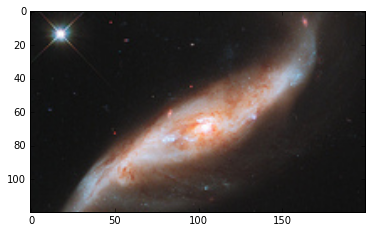

In [86]:
# Crop the image in x and y directions but keep all three colour components.
fig = plt.figure()
plt.imshow(galaxy_image[240:,200:400,:])


Similarly, if we need to reduce the image resolution for whatever reason, this can be done using array slicing operations.

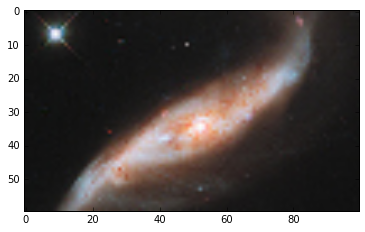

In [92]:
# Crop athe image and use only every other pixel in each direction to reduce the resolution.
fig = plt.figure()
plt.imshow(galaxy_image[240::2,200:400:2,:])


IMPORTANT NOTE: you should probably never do the above with actual astronomical data, because you're throwing away three quarters of your measurement. There are better ways to reduce image resolution which preserve much more of the data's integrity, and we will talk about these later. But it's useful to remember you can reduce an image's size like this, as long as you don't need that image for any actual science.

## Interpolation

In order to display a smooth image, `imshow()` automatically interpolates to find what values should be displayed between the given data points. The default interpolation scheme is `'linear'`, which interpolates linearly between points, as you might expect. The interpolation can be changed with yet another keyword in `imshow()`. Here are a few examples:

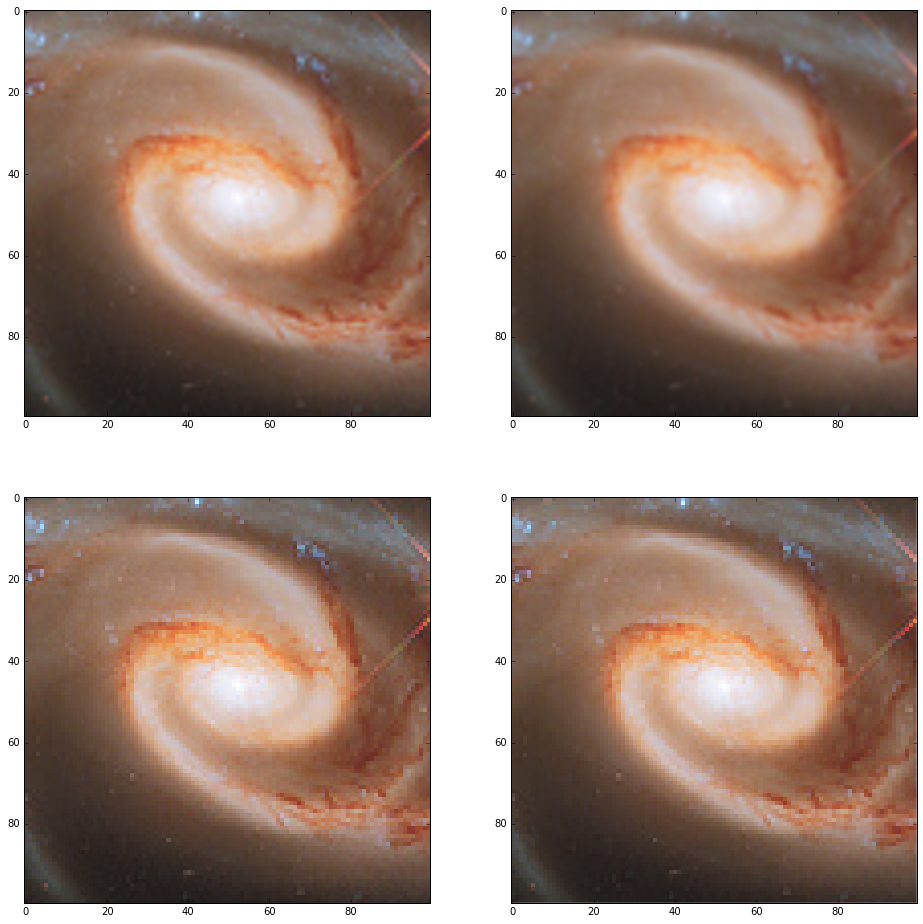

In [97]:
# Image with default interpolation
fig,ax = plt.subplots(2,2,figsize=(16,16))
smim = galaxy_image[:100,250:350,:]
ax[0,0].imshow(smim)
ax[0,1].imshow(smim,interpolation='bicubic')
ax[1,0].imshow(smim,interpolation='nearest')
ax[1,1].imshow(smim,interpolation='none')

This can be a useful way to change how the image appears. For instance, if the exact values of the data are extremely important, little or no interpolation may be appropriate so the original values are easier to discern, whereas a high level of interpolation can be used if the smoothness of the image is more important than the actual numbers.

Note that that `'none'` in the `imshow()` call above is NOT the same as `None`. `None` tells `imshow()` you are not passing it a variable for the `interpolation` keyword, so it uses the default, whereas `'none'` explicitly tells it not to interpolate.

## Animation

We have already seen animation of data points on basic plots in a previous lesson. Animating an image is no different in principle. To demonstrate this, we'll set up an animation that shows the Hubble image and then cycles through each of the RGB components. This task requires all the same parts as an animation of a line or scatter plot:

- First, we'll need `matplotlib.animation`, a figure and an axes. Then we'll plot the initial image we want to display and return the plot object to a variable we can use for the animation.
- Now we need to define the function that will adjust the image. This function, like the ones we used for line plots, needs to take as input an integer which counts the number of 'frames', adjust the displayed data and return the adjusted object.
- Then we can define the animation object and plot it to see the finished product.

<IPython.core.display.Javascript object>


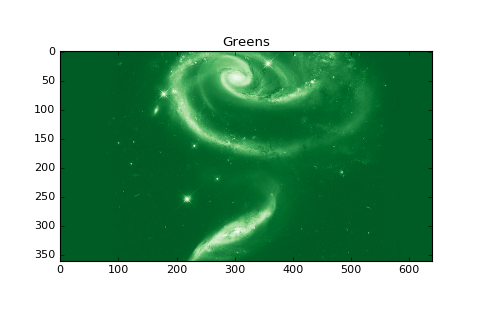

In [106]:
# We'll need this for displaying animations
import matplotlib.animation as ani
%matplotlib nbagg

fig,ax = plt.subplots()
display = ax.imshow(galaxy_image)

cmaps = ['Reds_r','Greens_r','Blues_r']
titles = ['Reds','Greens','Blues']
def animate(i):
    display.set_data(galaxy_image[...,i])
    display.set_cmap(cmaps[i])
    ax.set_title(titles[i])
    return display

my_animation = ani.FuncAnimation(fig,animate,range(3),interval=1000)
plt.show()

<section class="objectives panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Moving around an image </h3>
</div>

<ol>
    <li>Plot a small portion at one end of your chosen image. Then animate this plot so that it pans across to the other side of the image.</li>
</ol>
</section>

<IPython.core.display.Javascript object>


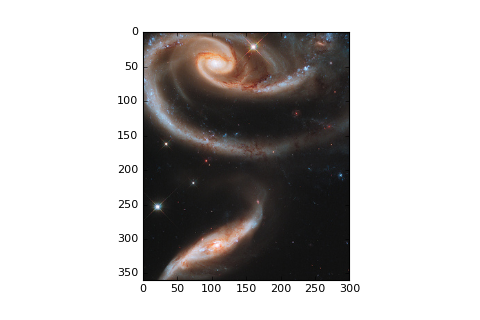

(360L, 640L, 3L)
340


In [133]:
# 1
# We'll need this for displaying animations
import matplotlib.animation as ani
import numpy as np
%matplotlib nbagg

fig,ax = plt.subplots()
wid = np.arange(0,300)
global wid
display = ax.imshow(galaxy_image[:,wid,:])
print(galaxy_image.shape)

def animate(i):
    
    display.set_data(galaxy_image[:,wid+i,:])
    xlm = [np.min(wid+i),np.max(wid+i)]
    
    return display

animate(10)
rng = galaxy_image.shape[1] - len(wid)
print(rng)
my_animation = ani.FuncAnimation(fig,animate,range(rng),interval=2)
plt.show()


## FITS files

A type of image file that you are quite likely to come across in astronomy is FITS (Flexible Image Transport System) files. This file type is used for storing various types of astronomical image data, including solar images. The advantage of FITS files is that as well as storing the numerical data which makes up the image, they also store a header associated with these data. The header usually contains information such as the spatial extent of the image, the resolution, the time at which the observation was taken, and various other properties of the data which may be useful when using the image for research. These pairs of data arrays and associated headers are stored in a HDU (Header-Data Unit). Several HDUs can be stored in a FITS file, so they are kept in a container called HDUList.



In [ ]:
#sunpy.data.download_sample_data()
